In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

In [2]:
# Load the credit card dataset
CC = pd.read_csv('CCsmall.csv')

# Define input and output features
X = CC[['V1','V2']]
y = CC[['Class']]

In [3]:
# Initialize a Gaussian naive Bayes model
GNBm = GaussianNB()

# Fit the model
GNBm.fit(X, np.ravel(y))

# Calculate the predictions for each instance in X
GNBypred = GNBm.predict(X)

# Display the confusion matrix
metrics.confusion_matrix(np.ravel(y), GNBypred)

array([[280734,   3581],
       [   361,    131]])

In [4]:
# Set the threshold T
T = 0.0002

# Calculate the predictions for each instance in X with new Threshold
GNBTypred = (GNBm.predict_proba(X)[:,1] >= T).astype(int)

# Display the confusion matrix
conMat = metrics.confusion_matrix(np.ravel(y), GNBTypred)
conMat

array([[230395,  53920],
       [    88,    404]])

In [5]:
#Create a data frame that displays the classification metrics
metricSummary = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision','Recall','Kappa'])

dictionary = {"GNB": GNBypred, "GNB_T": GNBTypred}
for key in dictionary:
    metricSummary.loc[len(metricSummary.index)] = ([key,
               metrics.accuracy_score(np.ravel(y), dictionary[key]),
               metrics.precision_score(np.ravel(y), dictionary[key]),
               metrics.recall_score(np.ravel(y), dictionary[key]),
               metrics.cohen_kappa_score(np.ravel(y), dictionary[key])])

#Display the metrics for the two models
metricSummary

,Model,Accuracy,Precision,Recall,Kappa
0,GNB,0.986159,0.035291,0.266260,0.059452
1,GNB_T,0.810370,0.007437,0.821138,0.011355


In [6]:
# False positive rate
FPR = conMat[0,1] / (conMat[0,1] + conMat[0,0])
FPR

0.18964880502259818

In [7]:
# True positive rate
TPR = conMat[1,1] / (conMat[1,1] + conMat[1,0])
TPR

0.8211382113821138

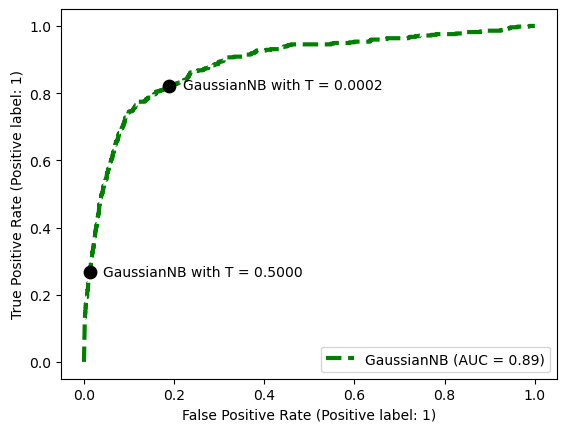

In [8]:
# Plot the ROC curve and put a point at the threshold = T and a point at threshold  = 0.5000
fig, ax = plt.subplots();
RocCurveDisplay.from_estimator(GNBm, X, y, linewidth=3, color="green", ax=ax, zorder=1, linestyle="dashed");
ax.scatter(x=np.ravel(FPR), y=np.ravel(TPR), color="black", s=80, zorder=2);
ax.text(FPR+0.03, TPR-0.01, f'GaussianNB with T = {T}', horizontalalignment='left', size='medium', color='black');
ax.scatter(x=np.ravel(0.012595184918136574), y=np.ravel(0.266260162601626), color="black", s=80, zorder=3);
ax.text(0.012595184918136574+0.03, 0.266260162601626-0.01, 'GaussianNB with T = 0.5000', horizontalalignment='left', size='medium', color='black');